# Import libraries

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The BigQuery client will be used to send and receive messages from the BigQuery API

In [193]:
from google.cloud import bigquery
client = bigquery.Client()

The dataset is saved from Big Query as a dataframe

In [194]:
sql = """
SELECT  * FROM `thematic-flash-266714.australia_weather.weather`
"""
df = client.query(sql).to_dataframe()

# Exploratory Data Analysis

**Preview the Dataset**

In [195]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-16,Albury,9.8,27.7,None,None,None,WNW,50,None,...,28.0,1013.4,1010.3,0,None,17.3,26.2,None,0.0,False
1,2009-02-04,Albury,21.7,36.9,0,None,None,None,None,None,...,26.0,1008.8,1004.7,None,None,25.5,35.2,No,0.0,False
2,2009-02-27,Albury,15.4,32.6,0,None,None,W,24,None,...,25.0,1016.2,1012.6,None,None,20.0,30.8,No,0.0,False
3,2009-03-06,Albury,7.6,24,0,None,None,WSW,30,None,...,23.0,1014.5,1012.0,None,None,12.6,22.0,No,0.0,False
4,2009-03-13,Albury,17.1,25.8,5.8,None,None,ENE,31,None,...,68.0,1017.4,1014.7,8,None,19.0,23.8,Yes,3.0,True


**Summary of dataset**

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  object 
 3   MaxTemp        141871 non-null  object 
 4   Rainfall       140787 non-null  object 
 5   Evaporation    81350 non-null   object 
 6   Sunshine       74377 non-null   object 
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  object 
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  object 
 12  WindSpeed3pm   139563 non-null  object 
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

We can see that the datatype of few columns is incorrect. So we need to convert them.

In [197]:
convert_dict = {'MinTemp': 'float64','MaxTemp': 'float64','Rainfall': 'float64','Evaporation': 'float64',
'Sunshine': 'float64','WindGustSpeed': 'float64','WindSpeed9am': 'float64','WindSpeed3pm': 'float64',
'Cloud9am': 'float64','Cloud3pm': 'float64'}

df = df.astype(convert_dict)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Comments**

From the above information we can gather that

- The dataset is a mixture of numerical and categorical values
- The datatype of categorical values is **object**
- The datatype of numerical values is **float64**
- The target variable RainTomorrow is a **boolean**

### Analysing the Target Variable

In [199]:
df['RainTomorrow'].isnull().sum()

0

In [200]:
df['RainTomorrow'].value_counts()

False    110316
True      31877
Name: RainTomorrow, dtype: int64

### Visualizing the Target Variable

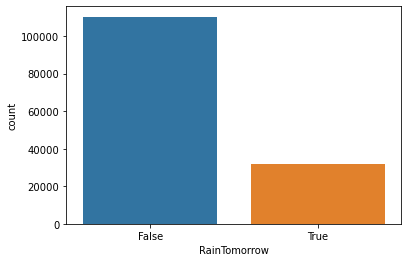

In [201]:
sns.countplot(df['RainTomorrow'])

**Findings after analyzing target variable**

- The target variable has no null values
- It has 2 unique values **True** and **False**
- There are **110316** entries for **False**
- There are **31877** entries for **True**
- We can conclude from the barplot that the number of False entries is significantly larger that number of True entries.

### Explore Categorical Variables

In [202]:
categorical=[]

for i in df.columns:
    if df[i].dtype=="object":
        categorical.append(i)

In [203]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-16,Albury,WNW,None,WNW,None
1,2009-02-04,Albury,None,None,None,No
2,2009-02-27,Albury,W,None,S,No
3,2009-03-06,Albury,WSW,None,WNW,No
4,2009-03-13,Albury,ENE,None,S,Yes


**Missing values in Categorical Variables**

In [204]:
df[categorical].isnull().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

**Checking number of unique labels in each column** 

In [205]:
for i in categorical:
    print(i, ' has ', len(df[i].unique()), ' unique labels')

Date  has  3436  unique labels
Location  has  49  unique labels
WindGustDir  has  17  unique labels
WindDir9am  has  17  unique labels
WindDir3pm  has  17  unique labels
RainToday  has  3  unique labels


The column **Date** has a lot of unique labels, it needs a bit of preprocessing.

In [206]:
df["Date"].dtype

dtype('O')

The data type of Date is Object, so we will convert it into datetime so that we can extract Year, Month and Day from it.

In [207]:
df['Date'] = pd.to_datetime(df['Date'])

In [208]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2009
2    2009
3    2009
4    2009
Name: Year, dtype: int64

In [209]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1     2
2     2
3     3
4     3
Name: Month, dtype: int64

In [210]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    16
1     4
2    27
3     6
4    13
Name: Day, dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

**The columns Year, Month and Day are added to the dataframe. Now we can drop the Date column.**

In [212]:
df.drop("Date",axis = 1,inplace = True)

In [213]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,None,WNW,...,0.0,NaN,17.3,26.2,None,0.0,False,2008,12,16
1,Albury,21.7,36.9,0.0,NaN,NaN,None,NaN,None,None,...,NaN,NaN,25.5,35.2,No,0.0,False,2009,2,4
2,Albury,15.4,32.6,0.0,NaN,NaN,W,24.0,None,S,...,NaN,NaN,20.0,30.8,No,0.0,False,2009,2,27
3,Albury,7.6,24.0,0.0,NaN,NaN,WSW,30.0,None,WNW,...,NaN,NaN,12.6,22.0,No,0.0,False,2009,3,6
4,Albury,17.1,25.8,5.8,NaN,NaN,ENE,31.0,None,S,...,8.0,NaN,19.0,23.8,Yes,3.0,True,2009,3,13


In [214]:
categorical=[]

for i in df.columns:
    if df[i].dtype=="object":
        categorical.append(i)

df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,WNW,None,WNW,None
1,Albury,None,None,None,No
2,Albury,W,None,S,No
3,Albury,WSW,None,WNW,No
4,Albury,ENE,None,S,Yes


In [215]:
for i in categorical:
    print(i, ' has ', len(df[i].unique()), ' unique labels')

Location  has  49  unique labels
WindGustDir  has  17  unique labels
WindDir9am  has  17  unique labels
WindDir3pm  has  17  unique labels
RainToday  has  3  unique labels


**The unique labels in each cateogorical column are**

In [216]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra',
       'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale',
       'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Dartmoor', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'SalmonGums',
       'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Katherine',
       'Uluru', 'Brisbane', 'PerthAirport', 'Perth', 'MelbourneAirport',
       'Watsonia', 'Darwin', 'SydneyAirport'], dtype=object)

In [217]:
df["WindGustDir"].unique()

array(['WNW', None, 'W', 'WSW', 'ENE', 'NW', 'S', 'SE', 'NE', 'ESE', 'SW',
       'E', 'SSE', 'NNE', 'N', 'SSW', 'NNW'], dtype=object)

In [218]:
df["WindDir9am"].unique()

array([None, 'E', 'N', 'S', 'W', 'NE', 'NW', 'SE', 'SW', 'ENE', 'ESE',
       'NNE', 'NNW', 'SSE', 'SSW', 'WNW', 'WSW'], dtype=object)

In [219]:
df["WindDir3pm"].unique()

array(['WNW', None, 'S', 'W', 'SE', 'ENE', 'WSW', 'SW', 'NE', 'SSE',
       'ESE', 'N', 'E', 'SSW', 'NW', 'NNW', 'NNE'], dtype=object)

In [220]:
df["RainToday"].unique()

array([None, 'No', 'Yes'], dtype=object)

### Explore Numerical Variables

In [221]:
numerical=[]

for i in df.columns:
    if df[i].dtype!="object":
        numerical.append(i)

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,Year,Month,Day
0,9.8,27.7,NaN,NaN,NaN,50.0,NaN,22.0,50.0,28.0,...,1010.3,0.0,NaN,17.3,26.2,0.0,False,2008,12,16
1,21.7,36.9,0.0,NaN,NaN,NaN,11.0,11.0,53.0,26.0,...,1004.7,NaN,NaN,25.5,35.2,0.0,False,2009,2,4
2,15.4,32.6,0.0,NaN,NaN,24.0,0.0,6.0,53.0,25.0,...,1012.6,NaN,NaN,20.0,30.8,0.0,False,2009,2,27
3,7.6,24.0,0.0,NaN,NaN,30.0,0.0,13.0,52.0,23.0,...,1012.0,NaN,NaN,12.6,22.0,0.0,False,2009,3,6
4,17.1,25.8,5.8,NaN,NaN,31.0,0.0,13.0,82.0,68.0,...,1014.7,8.0,NaN,19.0,23.8,3.0,True,2009,3,13


**Missing values in numerical variables**

In [222]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

**Checking for outliers**

Text(0, 0.5, 'WindSpeed3pm')

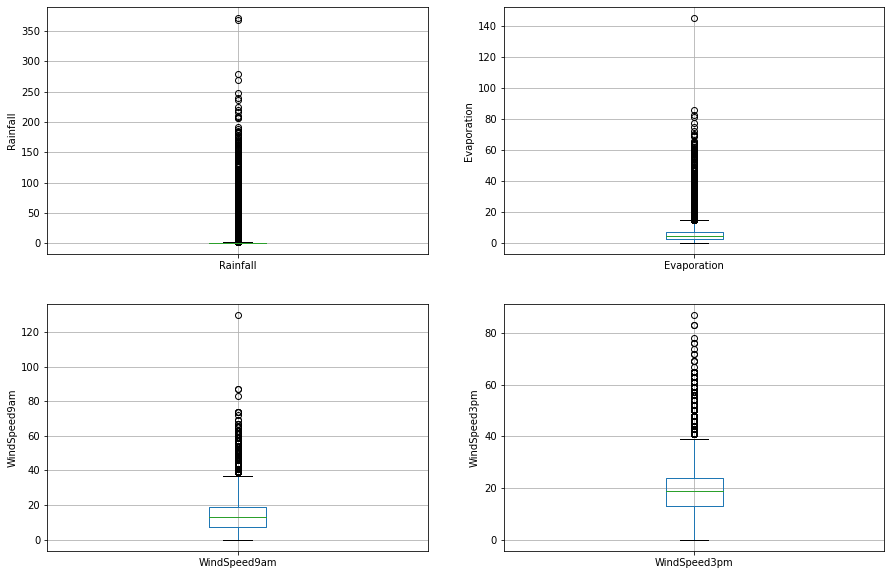

In [223]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

## Visualizations

### Heat Map

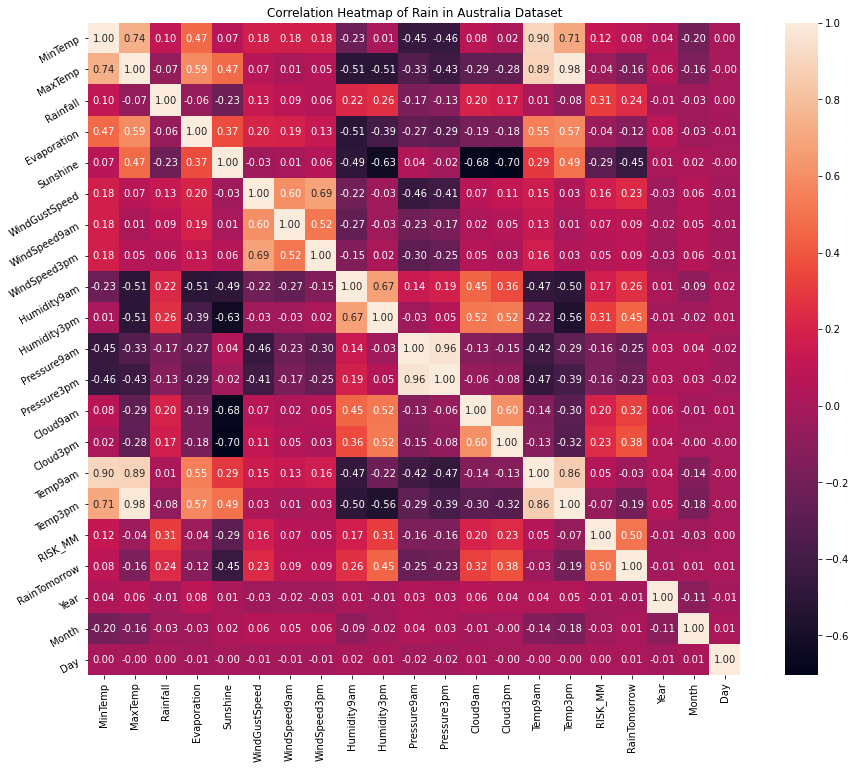

In [224]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Interpretation**

From the above correlation heat map, we can conclude that :-

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

#### Pair Plot

In [225]:
high_corr = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

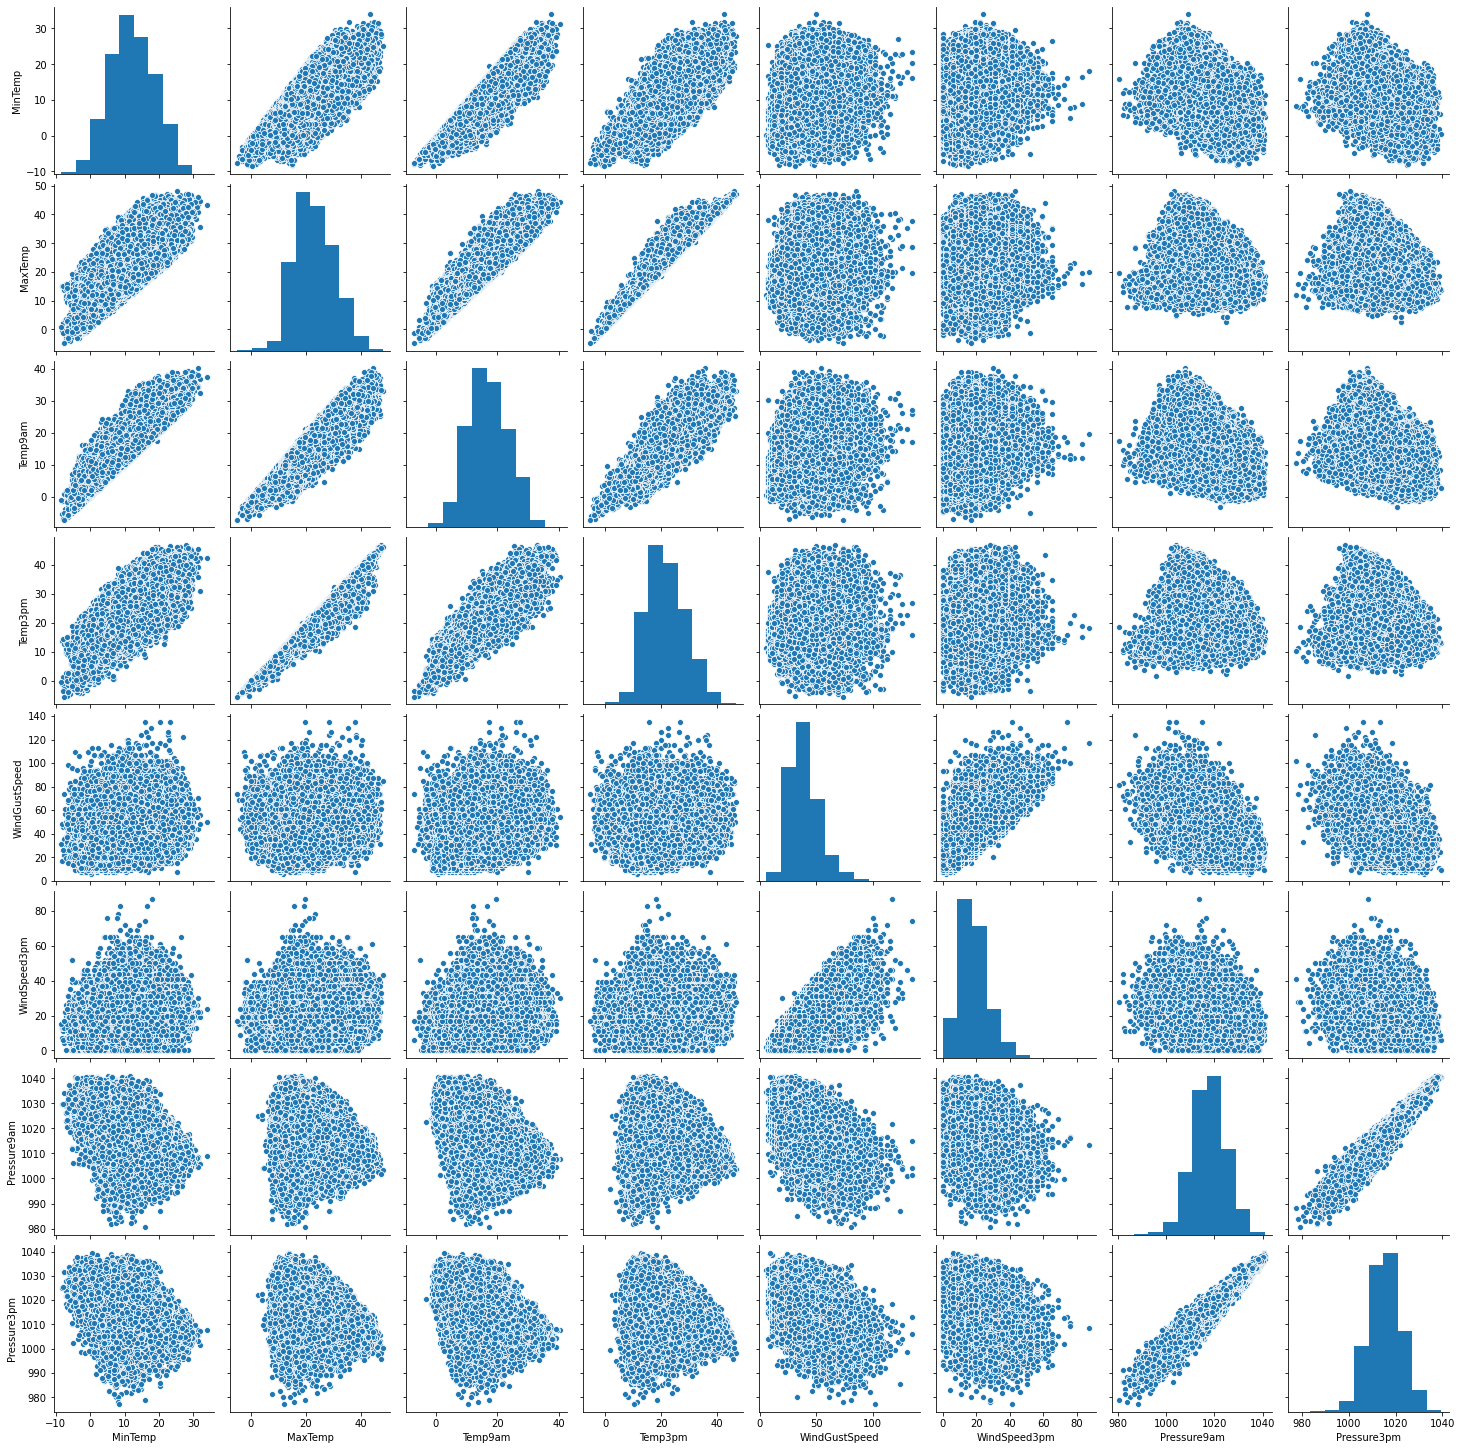

In [226]:
sns.pairplot(df[high_corr])
plt.show()

# Feature Engineering 

### Handle Missing Numerical Values 

In [227]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

**As the numerical data contains outliers, the best way to handle missing values is by replacing it with median of the respective columns.**

In [228]:
for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 

In [229]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

### Handle Missing Categorical Values 

In [230]:
df[categorical].isnull().sum()

Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

**We replace missing categorical variables with most frequent value of the column**

In [231]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [232]:
df[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Handle Outliers in Numerical Variables

**We will use top-coding approach to cap maximum values and remove outliers from the above variables.**

In [233]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

df['Rainfall'] = max_value(df, 'Rainfall', 3.2)
df['Evaporation'] = max_value(df, 'Evaporation', 21.8)
df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 55)
df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 57)

**Boxplot to check if there are any outliers**

Text(0, 0.5, 'WindSpeed3pm')

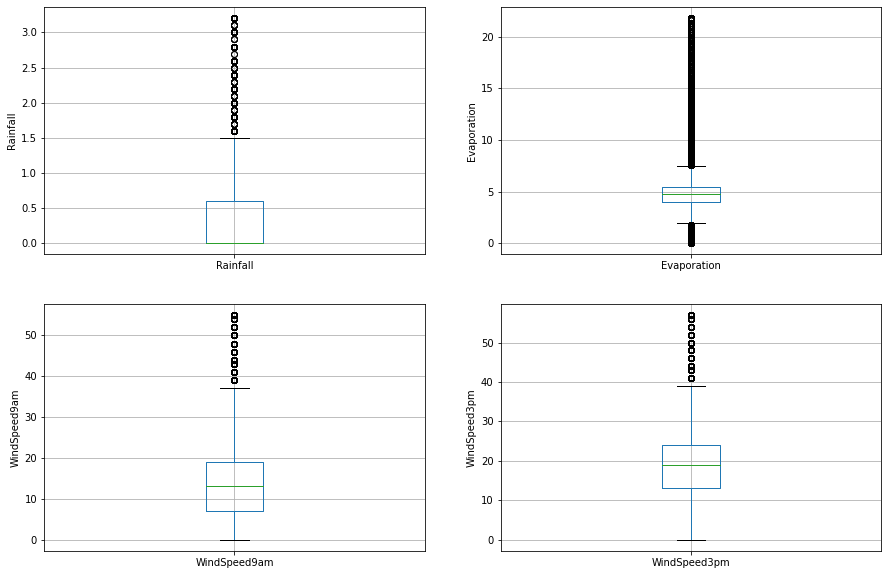

In [234]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

**We conclude from the boxplot that there are no more outliers in the dataset.**

### Encode categorical variables

In [235]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
df = encoder.fit_transform(df)

In [236]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,9.8,27.7,0.0,4.8,8.5,WNW,50.0,N,WNW,...,5.0,17.3,26.2,0,1,0.0,False,2008,12,16
1,Albury,21.7,36.9,0.0,4.8,8.5,W,39.0,N,SE,...,5.0,25.5,35.2,0,1,0.0,False,2009,2,4
2,Albury,15.4,32.6,0.0,4.8,8.5,W,24.0,N,S,...,5.0,20.0,30.8,0,1,0.0,False,2009,2,27
3,Albury,7.6,24.0,0.0,4.8,8.5,WSW,30.0,N,WNW,...,5.0,12.6,22.0,0,1,0.0,False,2009,3,6
4,Albury,17.1,25.8,3.2,4.8,8.5,ENE,31.0,N,S,...,5.0,19.0,23.8,1,0,3.0,True,2009,3,13


**We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.**

We will encode the **Location** and **WindGustDir** variables using One Hot Encoding.

In [239]:
df_new = pd.concat([df[numerical], df[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(df.Location), 
                     pd.get_dummies(df.WindGustDir)], axis=1)

In [240]:
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,9.8,27.7,0.0,4.8,8.5,50.0,13.0,22.0,50.0,28.0,...,0,0,0,0,0,0,0,0,1,0
1,21.7,36.9,0.0,4.8,8.5,39.0,11.0,11.0,53.0,26.0,...,0,0,0,0,0,0,0,1,0,0
2,15.4,32.6,0.0,4.8,8.5,24.0,0.0,6.0,53.0,25.0,...,0,0,0,0,0,0,0,1,0,0
3,7.6,24.0,0.0,4.8,8.5,30.0,0.0,13.0,52.0,23.0,...,0,0,0,0,0,0,0,0,0,1
4,17.1,25.8,3.2,4.8,8.5,31.0,0.0,13.0,82.0,68.0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
df_new.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM', 'RainTomorrow', 'Year', 'Month', 'Day',
       'RainToday_0', 'RainToday_1', 'Adelaide', 'Albany', 'Albury',
       'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane',
       'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin',
       'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini',
       'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa',
       'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland',
       'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport',
       'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole',
       'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongon

**Rename columns to avoid repetitive column names**

In [242]:
df_new.rename({'E':'E1', 'ENE':'ENE1', 'ESE':'ESE1', 'N':'N1', 'NE':'NE1', 'NNE':'NNE1',
       'NNW':'NNW1', 'NW':'NW1', 'S':'S1', 'SE':'SE1', 'SSE':'SSE1', 'SSW':'SSW1', 
        'SW':'SW1','W':'W1', 'WNW':'WNW1', 'WSW':'WSW1'}, axis=1, inplace=True)
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW1,NW1,S1,SE1,SSE1,SSW1,SW1,W1,WNW1,WSW1
0,9.8,27.7,0.0,4.8,8.5,50.0,13.0,22.0,50.0,28.0,...,0,0,0,0,0,0,0,0,1,0
1,21.7,36.9,0.0,4.8,8.5,39.0,11.0,11.0,53.0,26.0,...,0,0,0,0,0,0,0,1,0,0
2,15.4,32.6,0.0,4.8,8.5,24.0,0.0,6.0,53.0,25.0,...,0,0,0,0,0,0,0,1,0,0
3,7.6,24.0,0.0,4.8,8.5,30.0,0.0,13.0,52.0,23.0,...,0,0,0,0,0,0,0,0,0,1
4,17.1,25.8,3.2,4.8,8.5,31.0,0.0,13.0,82.0,68.0,...,0,0,0,0,0,0,0,0,0,0


Now we will encode the **WindDir9am** variables using One Hot Encoding.

In [243]:
df_new = pd.concat([df_new, pd.get_dummies(df.WindDir9am)], axis=1)

In [247]:
df_new.rename({'E':'E9am', 'ENE':'ENE9am', 'ESE':'ESE9am', 'N':'N9am', 'NE':'NE9am', 'NNE':'NNE9am',
       'NNW':'NNW9am', 'NW':'NW9am', 'S':'S9am', 'SE':'SE9am', 'SSE':'SSE9am', 'SSW':'SSW9am', 
        'SW':'SW9am','W':'W9am', 'WNW':'WNW9am', 'WSW':'WSW9am'}, axis=1, inplace=True)
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW9am,NW9am,S9am,SE9am,SSE9am,SSW9am,SW9am,W9am,WNW9am,WSW9am
0,9.8,27.7,0.0,4.8,8.5,50.0,13.0,22.0,50.0,28.0,...,0,0,0,0,0,0,0,0,0,0
1,21.7,36.9,0.0,4.8,8.5,39.0,11.0,11.0,53.0,26.0,...,0,0,0,0,0,0,0,0,0,0
2,15.4,32.6,0.0,4.8,8.5,24.0,0.0,6.0,53.0,25.0,...,0,0,0,0,0,0,0,0,0,0
3,7.6,24.0,0.0,4.8,8.5,30.0,0.0,13.0,52.0,23.0,...,0,0,0,0,0,0,0,0,0,0
4,17.1,25.8,3.2,4.8,8.5,31.0,0.0,13.0,82.0,68.0,...,0,0,0,0,0,0,0,0,0,0


Now we will encode the **WindDir3pm** variables using One Hot Encoding.

In [248]:
df_new = pd.concat([df_new, pd.get_dummies(df.WindDir3pm)], axis=1)

In [249]:
df_new.rename({'E':'E3pm', 'ENE':'ENE3pm', 'ESE':'ESE3pm', 'N':'N3pm', 'NE':'NE3pm', 'NNE':'NNE3pm',
       'NNW':'NNW3pm', 'NW':'NW3pm', 'S':'S3pm', 'SE':'SE3pm', 'SSE':'SSE3pm', 'SSW':'SSW3pm', 
        'SW':'SW3pm','W':'W3pm', 'WNW':'WNW3pm', 'WSW':'WSW3pm'}, axis=1, inplace=True)
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW3pm,NW3pm,S3pm,SE3pm,SSE3pm,SSW3pm,SW3pm,W3pm,WNW3pm,WSW3pm
0,9.8,27.7,0.0,4.8,8.5,50.0,13.0,22.0,50.0,28.0,...,0,0,0,0,0,0,0,0,1,0
1,21.7,36.9,0.0,4.8,8.5,39.0,11.0,11.0,53.0,26.0,...,0,0,0,1,0,0,0,0,0,0
2,15.4,32.6,0.0,4.8,8.5,24.0,0.0,6.0,53.0,25.0,...,0,0,1,0,0,0,0,0,0,0
3,7.6,24.0,0.0,4.8,8.5,30.0,0.0,13.0,52.0,23.0,...,0,0,0,0,0,0,0,0,1,0
4,17.1,25.8,3.2,4.8,8.5,31.0,0.0,13.0,82.0,68.0,...,0,0,1,0,0,0,0,0,0,0


# Load a Dataframe into BigQuery

In [253]:
import pandas_gbq

pandas_gbq.to_gbq(
    df_new, 'australia_weather.weather', project_id='thematic-flash-266714', if_exists='replace',
)

1it [00:27, 27.47s/it]
